<a href="https://colab.research.google.com/github/SYkkk55/Learn-Tensorflow-Keras-Note/blob/main/U9%2BU10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# U9

## 這一單元要使用 CIFAR-10 的資料庫
## 資料庫中有十種分類，分別是: 飛機、汽車、鳥、貓、鹿、狗、青蛙、船、卡車

# 1.下載Cifar10資料


In [1]:
from keras.datasets import cifar10
import numpy as np 
np.random.seed(10)

In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
print('train :',len(x_img_train))
print('test :',len(x_img_test))

# 有5萬筆訓練;1萬筆測試

print("train image shape :",x_img_train.shape)
# 總共有5萬張影像，每一張影像是32*32*3，最後一個3表示為RGB彩色影像

print("trian label shape :",y_label_train.shape)

train : 50000
test : 10000
train image shape : (50000, 32, 32, 3)
trian label shape : (50000, 1)


In [4]:
# 來看第0筆資料長甚麼樣子

print(x_img_test[0])
print(y_label_test[0])

[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ...
  [ 38  97 146]
  [ 13  64 108]
  [ 40  85 127]]

 [[ 61 116 168]
  [ 49 102 148]
  [ 35  85 132]
  ...
  [ 26  82 130]
  [ 29  82 126]
  [ 20  64 107]]

 [[ 54 107 160]
  [ 56 105 149]
  [ 45  89 132]
  ...
  [ 24  77 124]
  [ 34  84 129]
  [ 21  67 110]]]
[3]


In [5]:
# 來看多筆的image and label

# 先把分類轉換成文字

label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",
      7:"horse",8:"ship",9:"truck"}

In [6]:
import matplotlib.pyplot as plt

def plot_image_labels_prediction(images,labels,prediction,idx,num=10):

  fig=plt.gcf()
  fig.set_size_inches(16,8)

  if num>25:num=25
  for i in range(0,num):
    ax=plt.subplot(5,5,i+1)
    ax.imshow(images[idx],cmap='binary')

    title=str(i)+','+label_dict[labels[i][0]]
    if len(prediction)>0:
      title+='=>'+label_dict[prediction[i]]

    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show() 

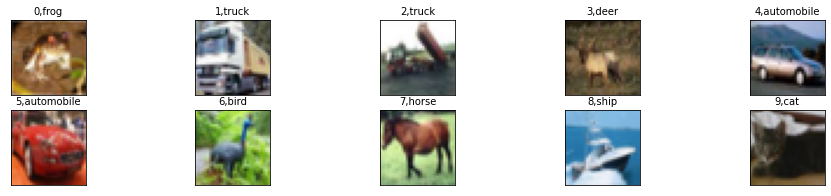

In [7]:
plot_image_labels_prediction(x_img_train,y_label_train,[],0)

# 2.資料前處理

In [8]:
print(x_img_train[0][0][0])

# 影像正規化
# normalize all/255
x_img_train_normalize=x_img_train.astype('float32')/255.0
x_img_test_normalize=x_img_test.astype('float32')/255.0

print(x_img_train_normalize[0][0][0])

[59 62 63]
[0.23137255 0.24313726 0.24705882]


In [9]:
y_label_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
# label 正規化 one hot

print(y_label_train[:5])

from keras.utils import np_utils
y_label_train_OneHot=np_utils.to_categorical(y_label_train)
y_label_test_OneHot=np_utils.to_categorical(y_label_test)

print(y_label_train_OneHot)
print(y_label_train_OneHot.shape)

[[6]
 [9]
 [9]
 [4]
 [1]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(50000, 10)


# U10
# 開始使用CNN

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

In [12]:
# 建立模型
model=Sequential()

# 建立卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))

# 加入dropout
model.add(Dropout(rate=0.25))

# 建立池化層1
model.add(MaxPooling2D(pool_size=(2,2)))

# 建立卷積層2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))

# 加入dropout
model.add(Dropout(0.25))

# 建立平坦層
model.add(Flatten())
model.add(Dropout(rate=0.25))

# 建立隱藏層
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

# 建立輸出層
model.add(Dense(10,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16384)             0

In [13]:
# 開始訓練

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=10,batch_size=128,verbose=1)

# 底下跑10個 epoch
# 每一個epoch 每一批資料因為為128筆，所以是總共40000筆資料/128一次=313

Epoch 1/10
313/313 [==============================] - 9s 28ms/step - loss: 1.5980 - accuracy: 0.4247 - val_loss: 1.2823 - val_accuracy: 0.5439
Epoch 2/10
313/313 [==============================] - 8s 27ms/step - loss: 1.2107 - accuracy: 0.5684 - val_loss: 1.1599 - val_accuracy: 0.5993
Epoch 3/10
313/313 [==============================] - 9s 27ms/step - loss: 1.0477 - accuracy: 0.6269 - val_loss: 1.0672 - val_accuracy: 0.6322
Epoch 4/10
313/313 [==============================] - 8s 27ms/step - loss: 0.9140 - accuracy: 0.6765 - val_loss: 0.9452 - val_accuracy: 0.6726
Epoch 5/10
313/313 [==============================] - 8s 27ms/step - loss: 0.7942 - accuracy: 0.7202 - val_loss: 0.9334 - val_accuracy: 0.6714
Epoch 6/10
313/313 [==============================] - 8s 27ms/step - loss: 0.6689 - accuracy: 0.7640 - val_loss: 0.9147 - val_accuracy: 0.6813
Epoch 7/10
313/313 [==============================] - 8s 27ms/step - loss: 0.5705 - accuracy: 0.7995 - val_loss: 0.8625 - val_accuracy: 0.7059

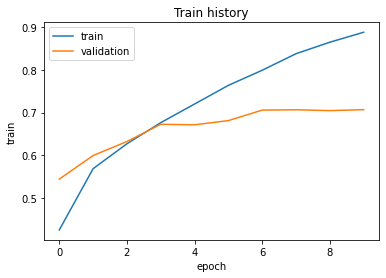

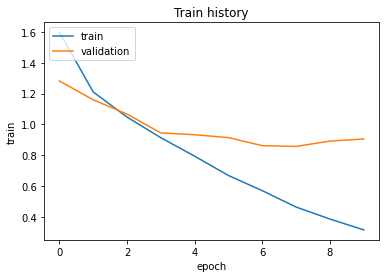

In [14]:
def show_train_history(train_history,train,validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('train')
  plt.xlabel('epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率


In [15]:
scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)
scores[1]

0.6955000162124634

In [16]:
# 進行預測

prediction = model.predict_classes(x_img_test_normalize)
prediction[:10]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, 0, 4, 6, 1, 6, 3, 1])

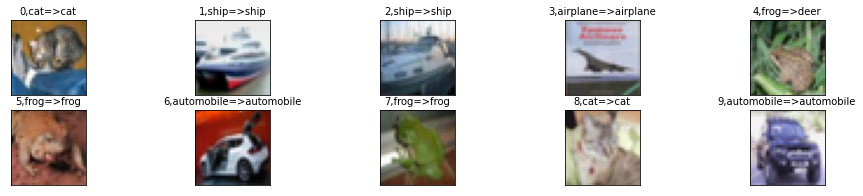

In [17]:
plot_image_labels_prediction(x_img_test,y_label_test,prediction,0,10)

In [18]:
Predicted_Probability=model.predict(x_img_test_normalize)

label: cat predict cat


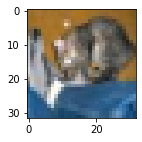

airplaneProbability: 0.000368072
automobileProbability: 0.000068074
birdProbability: 0.003527550
catProbability: 0.852452576
deerProbability: 0.005850250
dogProbability: 0.134105921
frogProbability: 0.000298286
horseProbability: 0.002257990
shipProbability: 0.001003677
truckProbability: 0.000067636


In [19]:
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
  print('label:',label_dict[y[i][0]],
     'predict',label_dict[prediction[i]])
  plt.figure(figsize=(2,2))
  plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
  plt.show()
  for j in range(10):
    print(label_dict[j]+'Probability: %1.9f'%(Predicted_Probability[i][j]))

show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,0)

label: airplane predict airplane


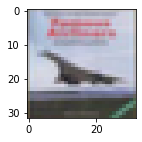

airplaneProbability: 0.688755810
automobileProbability: 0.002678981
birdProbability: 0.016130244
catProbability: 0.000126020
deerProbability: 0.005111547
dogProbability: 0.000000309
frogProbability: 0.000008707
horseProbability: 0.000031111
shipProbability: 0.287136942
truckProbability: 0.000020297


In [20]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,3)

# 混淆矩陣 confusion table


In [21]:
prediction.shape

(10000,)

In [22]:
y_label_test.shape

(10000, 1)

In [23]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [24]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,733,12,49,20,21,5,10,15,99,36
1,12,842,9,15,8,7,11,3,29,64
2,65,6,594,70,123,40,52,34,11,5
3,22,16,96,537,90,127,60,29,14,9
4,24,5,76,67,697,27,35,55,13,1
5,12,2,70,200,76,532,35,59,10,4
6,6,9,43,83,62,22,759,4,7,5
7,14,2,48,45,81,57,6,735,3,9
8,57,49,21,16,7,5,5,5,814,21


# 建立3次的卷積運算神經網路

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 128)      

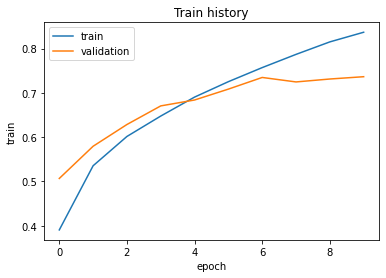

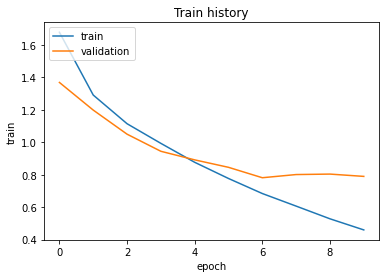

0.732699990272522

In [25]:
# 建立模型
model=Sequential()

# 建立卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))

# 加入dropout
model.add(Dropout(rate=0.25))

# 建立池化層1
model.add(MaxPooling2D(pool_size=(2,2)))

# 建立卷積層2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))

# 加入dropout
model.add(Dropout(0.25))

# 建立卷積層3
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))

# 加入dropout
model.add(Dropout(0.5))


# 建立平坦層
model.add(Flatten())
model.add(Dropout(rate=0.25))

# 建立隱藏層
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

# 建立輸出層
model.add(Dense(10,activation='softmax'))

print(model.summary())

# 開始訓練

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=10,batch_size=128,verbose=1)

# 底下跑10個 epoch
# 每一個epoch 每一批資料因為為128筆，所以是總共40000筆資料/128一次=313

def show_train_history(train_history,train,validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('train')
  plt.xlabel('epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')


scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)
scores[1]

# 優化模型 1

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 128)      

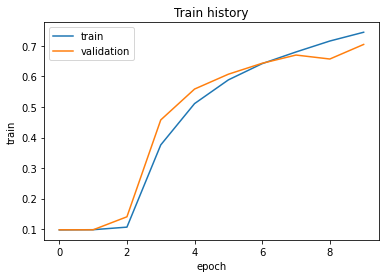

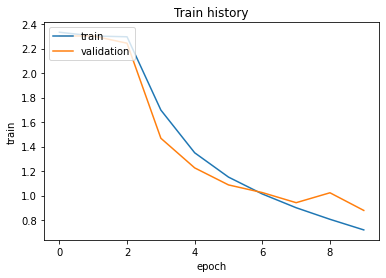

0.6970000267028809

In [26]:
# 建立模型
model=Sequential()

# 建立卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))

# 加入dropout
model.add(Dropout(rate=0.25))

# 建立池化層1
model.add(MaxPooling2D(pool_size=(2,2)))

# 建立卷積層2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))

# 加入dropout
model.add(Dropout(0.5))

# 建立卷積層3
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))

# 加入dropout
model.add(Dropout(0.5))

# 建立卷積層4
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))

# 加入dropout
model.add(Dropout(0.25))


# 建立平坦層
model.add(Flatten())
model.add(Dropout(rate=0.25))

# 建立隱藏層
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

# 建立輸出層
model.add(Dense(10,activation='softmax'))

print(model.summary())

# 開始訓練

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=10,batch_size=128,verbose=1)

# 底下跑10個 epoch
# 每一個epoch 每一批資料因為為128筆，所以是總共40000筆資料/128一次=313

def show_train_history(train_history,train,validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('train')
  plt.xlabel('epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')


scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)
scores[1]

# 優化模型 2

In [ ]:
# 建立模型
model=Sequential()

# 建立卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))

# 加入dropout
model.add(Dropout(rate=0.25))

# 建立池化層1
model.add(MaxPooling2D(pool_size=(2,2)))

# 建立卷積層2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))

# 加入dropout
model.add(Dropout(0.5))

# 建立卷積層3
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))

# 加入dropout
model.add(Dropout(0.5))

# 建立卷積層4
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))

# 加入dropout
model.add(Dropout(0.25))


# 建立平坦層
model.add(Flatten())
model.add(Dropout(rate=0.25))

# 建立隱藏層
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

# 建立輸出層
model.add(Dense(10,activation='softmax'))

print(model.summary())

# 開始訓練

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=30,batch_size=128,verbose=1)

# 底下跑10個 epoch
# 每一個epoch 每一批資料因為為128筆，所以是總共40000筆資料/128一次=313

def show_train_history(train_history,train,validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('train')
  plt.xlabel('epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')


scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)
scores[1]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 128)      